**Double click here and enter the student numbers for all minigroup members. Don't enter any names.**
1. **First student number**
2. **Second student number**
3. **Third student number.**

Before you start work on the project, **[click on this link to read the MATH0011 project instructions.](https://www.ucl.ac.uk/~ucahmto/0011/projectinstructions.html)**

# Project 5 - SET

SET is a card game played with cards that look like this

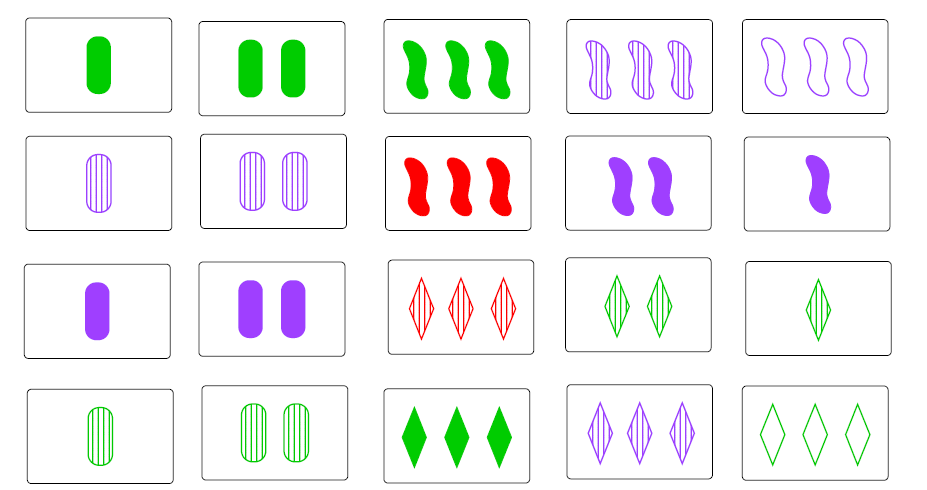

You can read the rules on the [SET website](https://www.setgame.com/set) and you can practise playing on their [daily SET puzzle](https://www.setgame.com/set/puzzle).

Each SET card has four different features: shape, number, colour, and shading.  Shape can be oval, squiggle, or diamond.  Number can be 1, 2, or 3.  Colour can be green, purple, or red (it's not a good game for people who are [red-green colourblind](https://www.nhs.uk/conditions/colour-vision-deficiency/), but you don't need to be able to distinguish the colours to complete this project).  Shading can be solid, stripe, or outline.  There are three choices for each of four features, so a total of $3^4 = 81$ cards - the picture above shows only 20 of these 81.

In a game of SET, 12 cards are dealt face up on the table.  Players have to identify a *SET* - three cards such that
- either they all have the same shape or they all have a different shape, AND
- either they all have the same number or they all have a different number, AND
- either they all have the same colour or they all have a different colour, AND
- either they all have the same shading or they all have a different shading.

When you see a set you call out "SET", take the three cards, and three more are dealt to replace them.  If all players agree that there are no sets on the table, three more cards are dealt - unless there are no cards left in which case the game ends.  The winner is the player with most cards when the game ends.

In this project you will write a class to represent a SET card and a function which determines whether a collection of cards contains a *SET*.  You will investigate how likely it is that 12 randomly chosen cards contain a *SET* and whether it would be feasible to test *all* possible collections of 12 cards for *SET*s in order to answer this precisely.

## Exercise 0 (no credit)

Read the rules of SET above and make sure you've understood them by completing the [daily SET puzzle](https://www.setgame.com/set/puzzle).

## Exercise 1

**Write a class `Card` representing a SET card.**  Your `__init__` function should take four arguments - the shape, number, colour, and shading of the card - in such a way that `Card("oval", 1, "green", "solid")` represents the card containg one solid green oval, for example.  **Override the `__eq__` method so that we can test `Card`s for equality with `==`**.

When you've written the `Card` class, **create a list `deck` of all 81 different SET cards with no repetition**.  You can do this with a list comprehension - I have provided lists of the three possible values for each feature which will be useful.

We know there are 81 cards, so `len(deck)` should be 81.  Check that your `deck` satisfies this.

In [0]:
shapes = ["oval", "squiggle", "diamond"]
numbers = [1, 2, 3]
colours = ["green", "purple", "red"]
shades = ["solid", "stripe", "outline"]

In [0]:
class Card:
    def __init__(self, shape, number, colour, shade):
        # your code goes here

In [0]:
deck = # your cod goes here

## Exercise 2

Write a function `is_SET(card1, card2, card3)` which returns `True` if `card1`, `card2`, and `card3` form a *SET* and `False` otherwise.  You can assume `card1`, `card2`, and `card3` are all different.

The cell after next contains some tests you can use to see if your function works correctly.

In [0]:
print(is_SET(Card("oval", 1, "green", "solid"), Card("squiggle", 2, "purple", "stripe"), Card("diamond", 3, "red", "outline"))) # should be True
print(is_SET(Card("oval", 3, "green", "solid"), Card("oval", 3, "purple", "stripe"), Card("oval", 3, "red", "outline"))) # should be True
print(is_SET(Card("squiggle", 2, "red", "outline"), Card("diamond", 2, "purple", "outline"), Card("oval", 2, "green", "outline"))) # should be True
print(is_SET(Card("squiggle", 1, "purple", "solid"), Card("squiggle", 3, "green", "solid"), Card("squiggle", 2, "red", "solid"))) # should be True
print(is_SET(Card("oval", 1, "green", "solid"), Card("squiggle", 1, "purple", "stripe"), Card("diamond", 3, "red", "outline"))) # should be False
print(is_SET(Card("squiggle", 3, "green", "solid"), Card("oval", 3, "purple", "stripe"), Card("oval", 3, "red", "outline"))) # should be False
print(is_SET(Card("squiggle", 3, "green", "solid"), Card("oval", 3, "purple", "stripe"), Card("diamond", 3, "red", "stripe"))) # should be False
print(is_SET(Card("squiggle", 1, "purple", "solid"), Card("squiggle", 3, "green", "solid"), Card("squiggle", 3, "red", "solid"))) # should be False
is_SET(Card("oval", 1, "green", "solid"),Card("squiggle", 1, "green", "stripe"),Card("oval", 1, "green", "outline"))
# output should be True True True True False False False False False

**Run the cell below** to define a function `contains_SET` which takes a collection of cards as its argument and returns `True` if any three of them form a set, otherwise `False`.   It uses your `is_SET` function.  You don't need to know how `itertools.combinations` works for the purposes of this project, but you can read [the online documentation](https://docs.python.org/3.7/library/itertools.html#itertools.combinations) if you want.  The `*` in the argument is called *unpacking*, again you don't need to know how it works for this project but you can read about it [on this website](https://www.geeksforgeeks.org/packing-and-unpacking-arguments-in-python/) if you want.

In [0]:
import itertools

def contains_SET(cards):
    """
    input: a collection of cards
    output: True if the cards contain three cards which make a SET, otherwise False
    """
    for triple in itertools.combinations(cards, 3):
        if is_SET(*triple):
            return True
    return False

## Exercise 3

Write a function `proportion_with_no_set(n)` performing the following task:
1. define a variable `count` and set it to zero
2. repeat `n` times:
   - choose a collection `t` of 12 **distinct** cards from `deck` at random
   - if `contains_SET(t)` is `False`, increase `count` by 1.
3. return `count / n`. This is an estimate of the probability 12 randomly chosen cards contain no *SET*.

To choose 12 distinct cards from the deck at random you can use the `numpy` function [random.choice](https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.choice.html).  Pay attention to the `replace` parameter to ensure that you are getting 12 distinct cards.

Print the value of `proportion_with_no_set(10000)`.

## Exercise 4

A very rough estimate for the amount of time your computer would take to run `contains_SET` on a collection of 12 cards is `0.001` seconds.  (If you want to verify this for yourself you can investigate the Python [timeit](https://docs.python.org/3/library/timeit.html) module, but there's no need to do it for this project).  Use the next cell to estimate how many **years** it would take to check all
$$ \binom{81}{12} $$
different collections of 12 cards from our deck.  You will need a function that computes binomial coefficients: either write it yourself, or look for one in the [scipy](https://docs.scipy.org/doc/scipy-0.14.0/reference/index.html) module.

This answer should convince you that our current code isn't adequate for finding exactly how many 12-card collections contain no *SET*.  If we wanted to do that in a reasonable period of time we'd have to either make `is_SET` and `contains_SET` a *lot* faster or come up with a method which didn't involve enumerating every single size 12 subset of our deck.  Brute force can be tempting when you have learned to code, but it doesn't always work.

# Submitting your project

Have you done all of the following things?

0. Included **all** minigroup members' student numbers at the top of this notebook.
1. Read through every exercise to check you have answered every part.
1. Carefully read and followed all of the [MATH0011 project instructions](https://www.ucl.ac.uk/~ucahmto/0011/projectinstructions.html).
2. Checked that all of the code in this notebook works correctly.

If you have, you're ready to submit.  One minigroup member only should download the completed notebook (in CoCalc, click the File menu next to the green Save button, then click Download) and submit it on the MATH0011 Moodle.  Please submit **only one file per minigroup.**